# ETF factor decomposition

In [1]:
import edhec_risk_kit as erk
import fama_french_import as ff
import yahoo_import as yahoo

### Data Import

Import fama fench factor data

In [2]:
factors = ff.get_ff_factors("North_America_5_Factors", daily=True)
factors.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1990-07-02,0.30,-0.36,-0.11,0.30,-0.02,0.03
1990-07-03,0.13,-0.08,-0.41,0.41,-0.20,0.03
1990-07-04,-0.02,-0.02,0.02,-0.01,0.00,0.03
1990-07-05,-0.99,0.45,0.10,-0.09,-0.01,0.03
1990-07-06,0.56,-0.52,-0.36,0.38,-0.02,0.03


In [3]:
print (factors.index.min())
print (factors.index.max())

1990-07-02 00:00:00
2022-02-28 00:00:00


Import ETF Data

In [4]:
symbols_usa = [
    #iShares Core S&P 500 UCITS ETF
    "CSPX.AS",
    #iShares S&P SmallCap 600 UCITS ETF
    "ISP6.L",
    #iShares S&P 500 Value ETF (IVE)
    "IVE",
    #iShares S&P Small-Cap 600 Value ETF (IJS)
    "IJS"
]

#yahoo.download_portfolio(symbols_usa)
portfolio_returns = yahoo.read_portfolio(symbols_usa)

<AxesSubplot:xlabel='Date'>

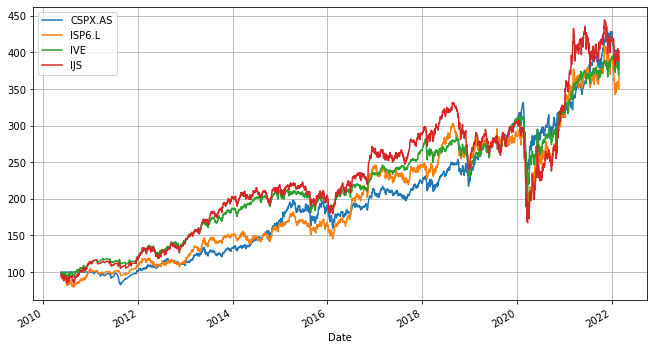

In [14]:
wealth = erk.compound_returns(portfolio_returns, 100)
wealth.plot(grid=True, figsize=(11,6))

Get the max slice of both Dataframes with the same dates

In [6]:
max_date_range = erk.get_max_compatible_date_range(portfolio_returns, factors)

In [7]:
portfolio_returns = portfolio_returns[max_date_range[0]:max_date_range[1]]
factors = factors[max_date_range[0]:max_date_range[1]]

### Factor regression

Get the excess returns (subtract risk free rate) from our portfolio

<AxesSubplot:ylabel='Frequency'>

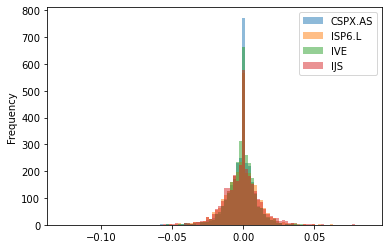

In [8]:
portfolio_excess_rets = portfolio_returns.sub(factors['RF'], axis=0).fillna(0)
portfolio_excess_rets.plot.hist(bins=100, alpha=0.5)

Prepare 3 factors (Market risk free, size, value) with an error correlation equal to 1 to feed to the regression.

In [9]:
factors_input = factors.drop(columns=["RF", "RMW", "CMA"])

In [10]:
lm = erk.linear_regression(portfolio_excess_rets["IVE"], factors_input)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IVE   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     2914.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:22:00   Log-Likelihood:                 11646.
No. Observations:                3074   AIC:                        -2.328e+04
Df Residuals:                    3070   BIC:                        -2.326e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0084   9.51e-05     88.325      0.000       0.008       0.009
SMB           -0.0012      0.000     -5.985      0.000      -0.002      -0.001
HML            0.0035      0.000     24.185      0.000       0.003       0.004
Alpha         -0.0017    9.9e-05    -16.850      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      590.672   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16878.737
Skew:                           0.060   Prob(JB):                         0.00
Kurtosis:                      14.479   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

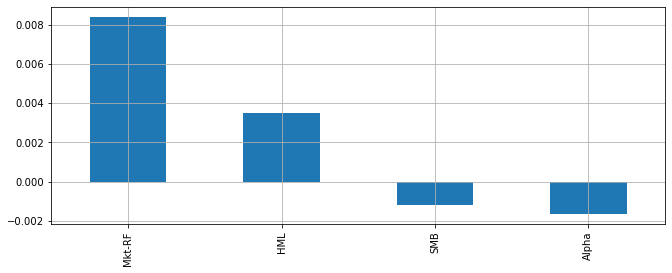

In [11]:
betas = lm.params
betas.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))